# Automated Readability Index

 #### A readability index is an estimation of how difficult a text is to read. The estimation is made by measuring a text's complexity. Measurable attributes of texts such as word lengths, sentence lengths, syllable counts, and so on give us ways to measure the complexity of a text. Text complexity is then compared to how well readers comprehend the text. From this data, a formula is created which predicts a text's reading difficulty from its complexity.

#### The automated readability index (ARI) is a readability test for English texts, designed to gauge the understandability of a text. The formula for calculating the automated readability index is given below:

#### ARI Score = 4.71 x (no. of characters in text /no. of words in text) + 0.5 x (no. of words in text /no. of sentences in text) - 21.43

#### I am going to use some popular books such as the Harry Potter Series and the Lord of the Rings Series, along with some more difficult scientific and literary texts to compute their ARI scores. 


#### ARI scores lie between the range of 1-14 and each number corresponds to a recommended reading age. For example, an ARI score of 5 means that the text is suitable for children ages 9-10. 

#### The below table gives the age ranges based on ARI scores : 

In [1]:
from IPython.display import Image
Image(url= "https://www.beliefmedia.com.au/wp-content/uploads/2017/08/us-grade-level-ari.jpg")

In [2]:
import nltk, os, os.path

### I am using only NLTK and a few built-in Python libraries like string and math for this project. I am also creating and loading my own corpora using nltk.data

In [3]:
## Loading our own corpora

path = os.path.expanduser('/home/allomorph/nltk_data')

if not os.path.exists(path):
    os.mkdir(path)

## Below command should return True    
os.path.exists(path)

True

In [4]:
import nltk.data

## Below command should return True
path in nltk.data.path

True

## The Program :

#### Below is the program I wrote to compute ARI Scores for any given text

In [5]:
from __future__ import print_function
from __future__ import division

import string
import re
import math
import operator
from collections import Counter
from nltk import word_tokenize
from nltk import sent_tokenize

exclude = list(string.punctuation)


def legacy_round(number, points=0):
    """Function that rounds of each score to the nearest decimal"""
    p = 10 ** points
    return float(math.floor((number * p) + math.copysign(0.5, number))) / p


def automated_readability_index(text):
    text = "".join(chr(x) for x in text)
    
    def char_count(text, ignore_spaces=True):
        """Function to compute the number of characeters in a text"""
        if ignore_spaces:
            text = text.replace(" ", "")
        count = 0
        for i in range(len(text)):
            count += 1
        return count
    
    def word_count(text, removepunct=True):
        """Function to compute the number of words in a text"""
        if removepunct:
            count = len([w for w in word_tokenize(text) if w not in exclude])
        return count
    
    def sentence_count(text):
        """Function to compute the number of sentences in a text"""
        sents = sent_tokenize(text)
        count = 0
        for i in range(len(sents)):
            count += 1
        return count
    
    """The Algorithm to compute Automated Readability Index Scores for each text"""
    chars = char_count(text)
    words = word_count(text)
    sentences = sentence_count(text)
    try:
        a = float(chars)/float(words)
        b = float(words)/float(sentences)
        readability = ((4.71 * legacy_round(a, 2)) + (0.5 * legacy_round(b, 2)) - 21.43)
        return legacy_round(readability, 1)
    except ZeroDivisionError:
        return 0.0

### Now, we can load all our corpora and test the program on each of them to find out the ARI score of each text!

## Loading all our Corpora and Computing Scores for each text

### Corpus 1 : Harry Potter and the Sorcerer's Stone - J.K. Rowling

In [6]:
hp1 = nltk.data.load('corpora/corpora_nlpwp/HarryPotter1-Sorcerer\'sStone.txt',format='raw')

In [7]:
# Computing ARI score

hp1_ARI = automated_readability_index(hp1)
print("The ARI Score for this text is {}.".format(hp1_ARI))

The ARI Score for this text is 5.6.


#### Result : With an ARI score of 5.6, this text is suitable for readers of ages 9-10. 

### Corpus 2 : Harry Potter and the Goblet of Fire - J.K. Rowling

In [8]:
hp2 = nltk.data.load('corpora/corpora_nlpwp/HarryPotter4-TheGobletOfFire.txt',format='raw')

In [9]:
# Computing ARI score

hp2_ARI = automated_readability_index(hp2)
print("The ARI Score for this text is {}.".format(hp2_ARI))

The ARI Score for this text is 5.4.


#### Result : With an ARI score of 5.4, this text is suitable for readers of ages 9-10.

### Corpus 3 : The Lord of the Rings - The Fellowship of the Ring  - J.R.R. Tolkien

In [10]:
lotr1 = nltk.data.load('corpora/corpora_nlpwp/01-TheFellowshipOfTheRing.txt',format='raw')

In [11]:
# Computing ARI score

lotr1_ARI = automated_readability_index(lotr1)
print("The ARI Score for this text is {}.".format(lotr1_ARI))

The ARI Score for this text is 6.0.


#### Result : With an ARI score of 6.0, this text is suitable for readers of ages 10-11. 

### Corpus 4 : The Lord of the Rings - The Return of the King - J.R.R. Tolkien

In [12]:
lotr2 = nltk.data.load('corpora/corpora_nlpwp/03-TheReturnOfTheKing.txt',format='raw')

In [13]:
# Computing ARI score

lotr2_ARI = automated_readability_index(lotr2)
print("The ARI Score for this text is {}.".format(lotr2_ARI))

The ARI Score for this text is 6.0.


#### Result : With an ARI score of 6.0, this text is suitable for readers of ages 10-11.

### Corpus 5 : A Brief History of TIme - Stephen Hawking

In [14]:
abhot = nltk.data.load('corpora/corpora_nlpwp/abhot.txt',format='raw')

In [15]:
# Computing ARI score

abhot_ARI = automated_readability_index(abhot)
print("The ARI Score for this text is {}.".format(abhot_ARI))

The ARI Score for this text is 14.5.


#### Result : With an ARI score of 14.5, this text is suitable for readers of ages 18-22+. 

### Corpus 6 : Moby Dick - Herman Melville

In [16]:
moby = nltk.data.load('corpora/corpora_nlpwp/mobydick.txt',format='raw')

In [17]:
# Computing ARI score

moby_ARI = automated_readability_index(moby)
print("The ARI Score for this text is {}.".format(moby_ARI))

The ARI Score for this text is 11.6.


#### Result : With an ARI score of 11.6, this text is suitable for readers of ages 15-16.

### A Plot to see where each of the texts fall on the Age Scale(Y-Axis) :

Text(11.6,16,'Moby Dick')

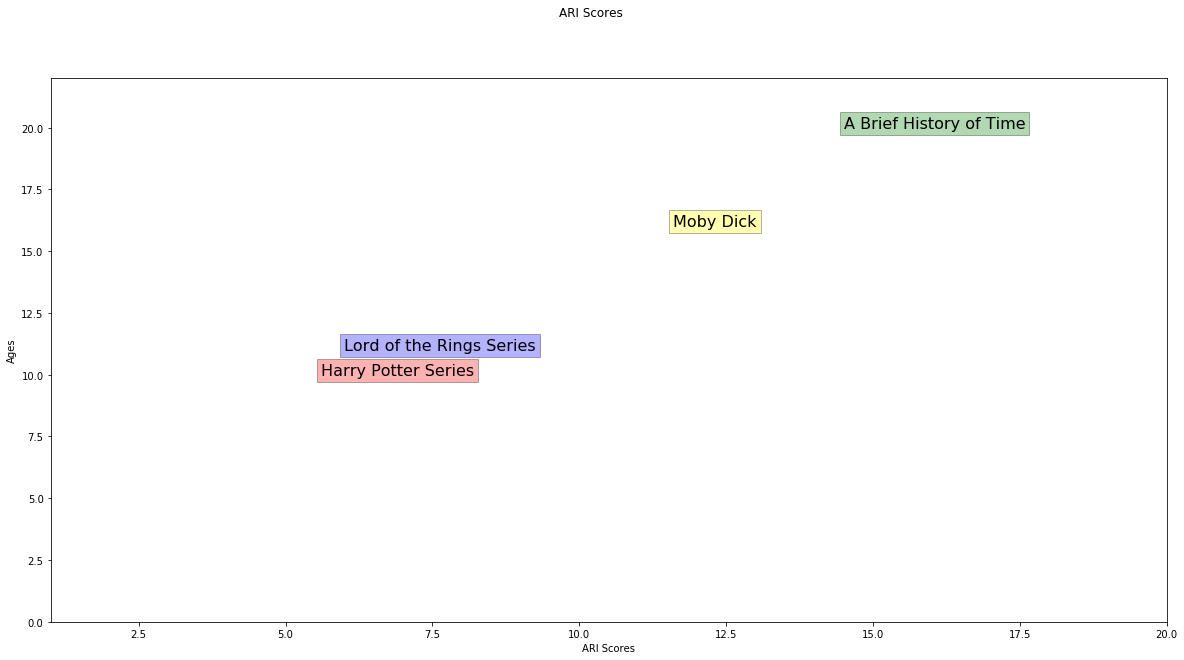

In [19]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

plt.suptitle('ARI Scores')
plt.ylabel('Ages')
plt.xlabel('ARI Scores')
axes = plt.gca()
axes.set_xlim([1,20])
axes.set_ylim([0,22])
plt.text(hp1_ARI, 10, "Harry Potter Series", fontsize=16,bbox=dict(facecolor='red', alpha=0.3), fontdict=None, withdash=False)
plt.text(lotr1_ARI, 11, "Lord of the Rings Series", fontsize=16,bbox=dict(facecolor='blue', alpha=0.3), fontdict=None, withdash=False)
plt.text(abhot_ARI, 20, "A Brief History of Time", fontsize=16, bbox=dict(facecolor='green', alpha=0.3), fontdict=None, withdash=False)
plt.text(moby_ARI, 16, "Moby Dick", fontsize=16,bbox=dict(facecolor='yellow', alpha=0.3), fontdict=None, withdash=False)

### Conclusion :

#### There are other other formulae apart from ARI that are used to assess age suitability of a text such as the Flesch-Kincaid Formula, the Coleman-Liau Formula. Some of them use syllable count, while others use word count and character count like the ARI formula, I used the ARI formula because it is the most releavant to Computational Linguistics and easy to implement using NLP with Python. These are methods of English Language Teaching(ELT) applied by academics and sociolinguists to help make reading an optimal process for readers of all ages.